In [2]:
# https://www.kaggle.com/aremoto/retail-sales-forecast

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
stores = pd.read_csv('./data/stores data-set.csv')
features = pd.read_csv('./data/Features data set.csv')
sales = pd.read_csv('./data/sales data-set.csv')

In [4]:
# format Date as datetime
features['Date']=pd.to_datetime(features['Date'])
sales['Date']=pd.to_datetime(sales['Date'])

In [5]:
print(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [6]:
#Merge the data in a unique DataFrame
df = pd.merge(sales, features, how = 'left', on = ['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, how = 'left', on = ['Store'])

df=df.fillna(0)
# convert Faraday to Celsius
df['Temperature'] = (df['Temperature']- 32) * 5/9

# turn Type into a numeric var
types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [7]:
# drop duplicated if any
print('training_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

training_data duplicated:0


In [8]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [28]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'dtypes'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T).rename(index={0:'Count null'})
df_info= df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T).rename(index={0:'% null'})

In [29]:
df_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
dtypes,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
Count null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
pd.DataFrame(df.isnull().sum()).T

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


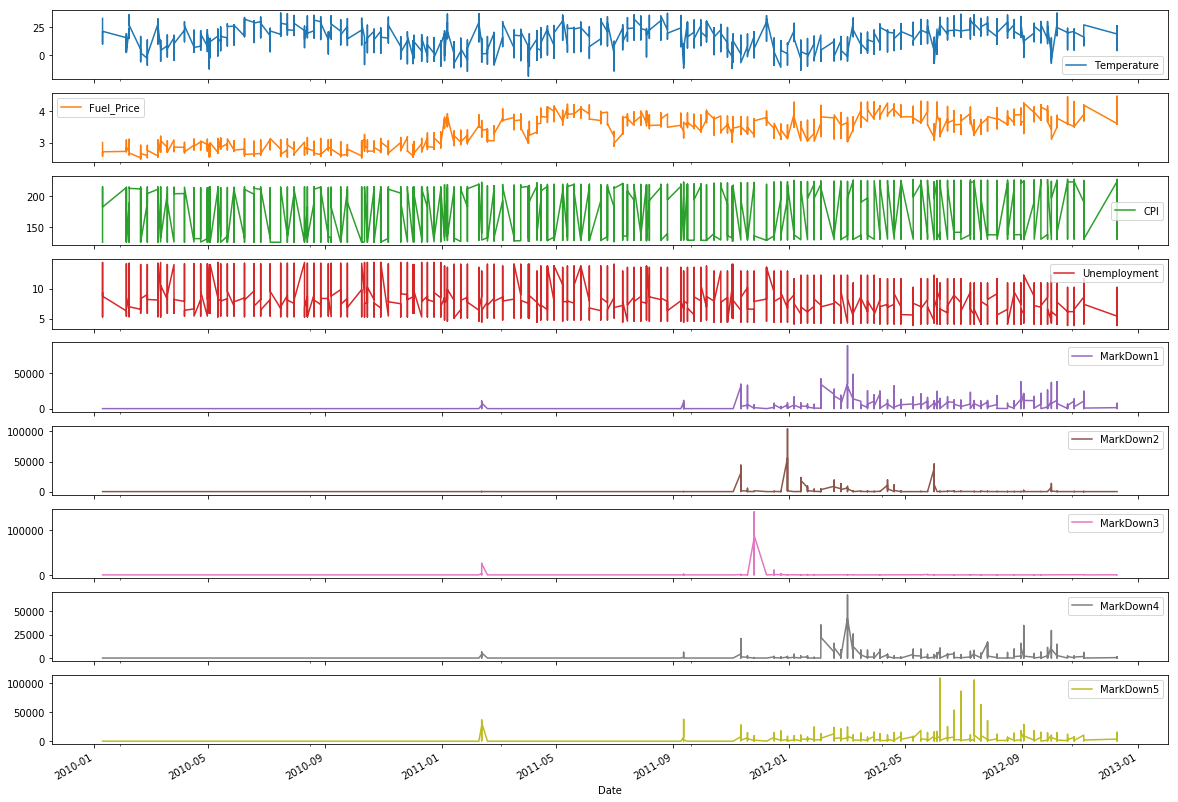

In [53]:
# Visualise data
columns = ['Date','Temperature','Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[columns].plot(x='Date', subplots = True, figsize = (20,15))
plt.show()

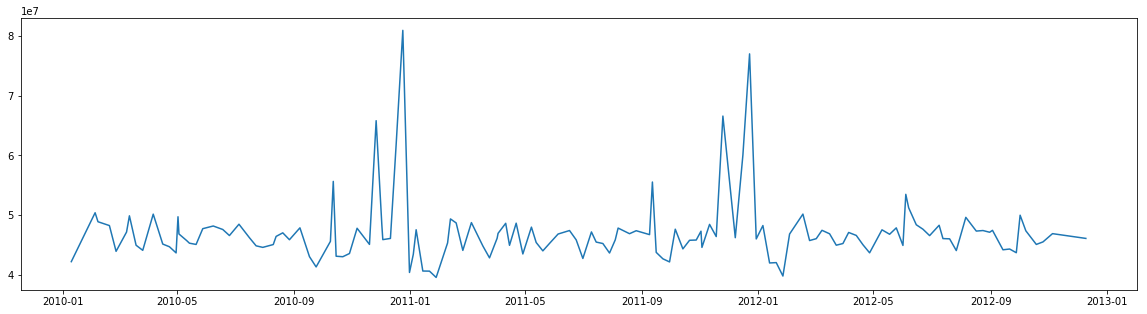

In [61]:
# Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain
df_sum_sales_week = df.groupby(['Date'], as_index = False)['Weekly_Sales'].sum()
df_sales_sort = df_sum_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_sum_sales_week.Date, df_sum_sales_week['Weekly_Sales'])
plt.show()

In [62]:
#the best weeks
df_sales_sort.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [63]:
#the best weeks
df_sales_sort.tail()

,Date,Weekly_Sales
50,2011-01-14,40673678.04
51,2011-01-21,40654648.03
47,2010-12-31,40432519.00
103,2012-01-27,39834974.67
52,2011-01-28,39599852.99


In [66]:
# top performing types of stores in terms of sales
df_top_stores = df.groupby('Type', as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [68]:
# top performing stores in terms of sales
df_top_stores = df.groupby('Store', as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False).head(3)

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


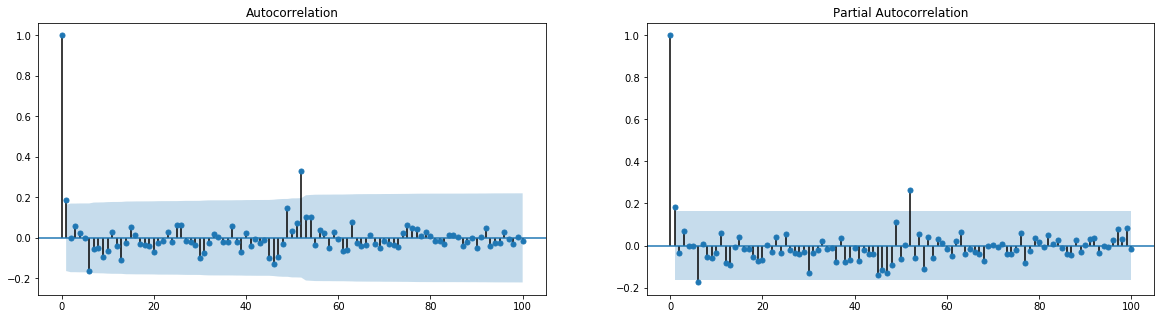

In [72]:
# Forecast of the total sales
from pandas.core import datetools

ts = df_sum_sales_week.set_index('Date')
#ts = ts.resample('H').ffill()
#ts = ts.resample('W').sum()

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()

In [89]:
# Implement AR correlation to allow non-consecutive seasonality terms like weeks 1,6,52
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    X=np.array([ ts.values[(i-orders)].squeeze() 
                if i >= np.max(orders) 
                else np.array(len(orders) * [np.nan]) 
                for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    y = ts.values
    
    model = LinearRegression()
    model.fit(X[mask],y[mask])
    
    print(model.coef_, model.intercept_)
    print('Score factor: %.2f' % model.score(X[mask],y[mask]))
    
    return model.coef_, model.intercept_
    
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept
                     if i >= np.max(orders) else np.nan for i in range(len(ts))])




[[ 0.13488444 -0.06693086  0.53027452]] [19022705.56418595]
Score factor: 0.41


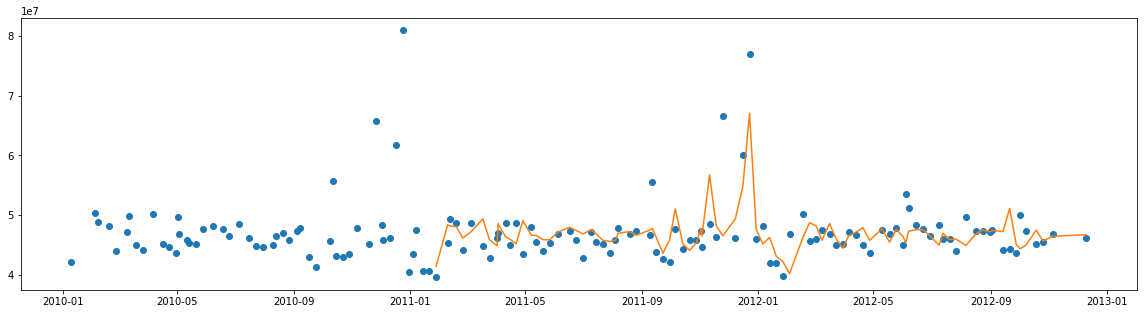

In [92]:
orders=np.array([1,6,52])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.07


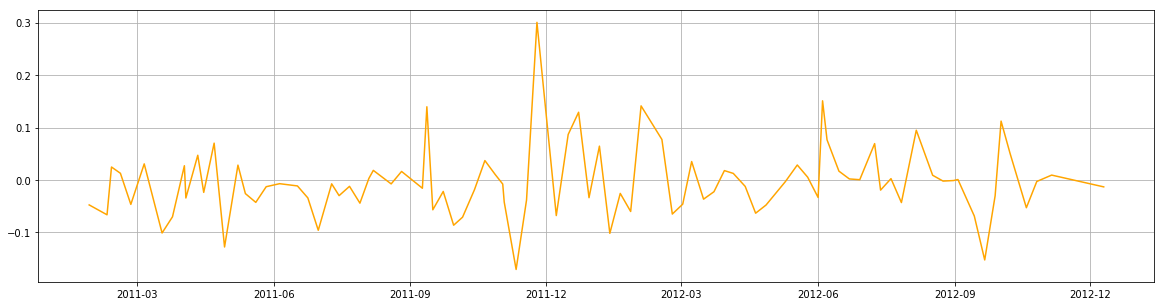

In [93]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

In [99]:
# Forecast of the sales volume for one store

df20 = df.where(df['Store'] == 20)
df20 = df20.dropna()
df20 = df20.groupby(by=['Date'], as_index = False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

,Weekly_Sales
Date,
2010-01-10,1933719.21
2010-02-04,2405395.22
2010-02-07,2143676.77
2010-02-19,2161549.76
2010-02-26,1898193.95


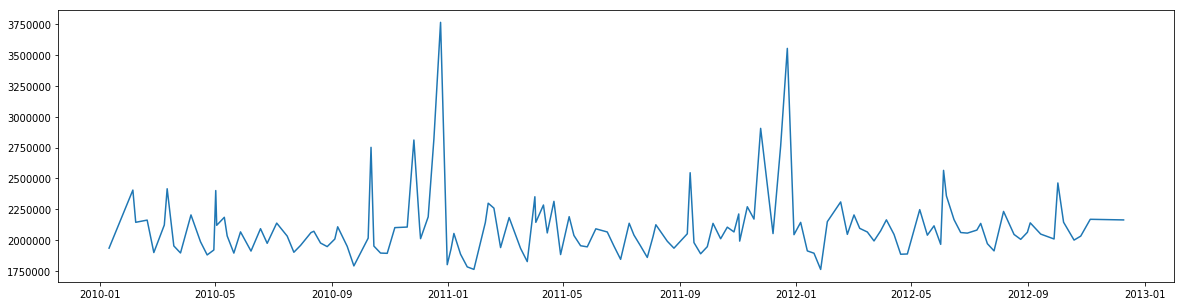

In [100]:
plt.figure(figsize=(20,5))
plt.plot(df20.index, df20.values)
plt.show()

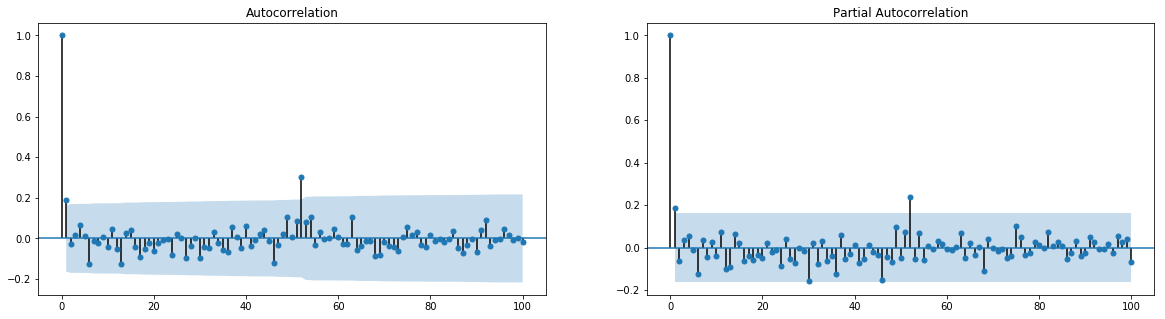

In [102]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df20.values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(df20.values, lags=100, alpha=0.05, ax=axes[1])
plt.show()

[[ 0.10930369 -0.05888729  0.04638539 -0.07044943  0.46939893]] [1075563.7365969]
Score factor: 0.34


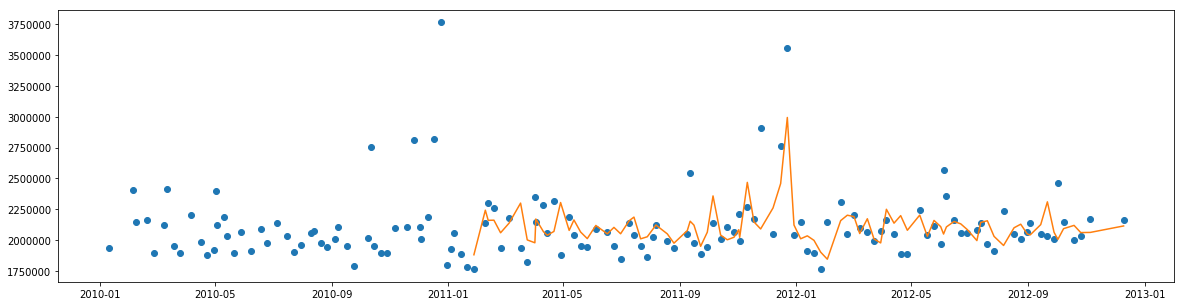

In [103]:
orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model(df20,orders)
pred=pd.DataFrame(index=df20.index, data=predict_ar_model(df20, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.01, std 0.08


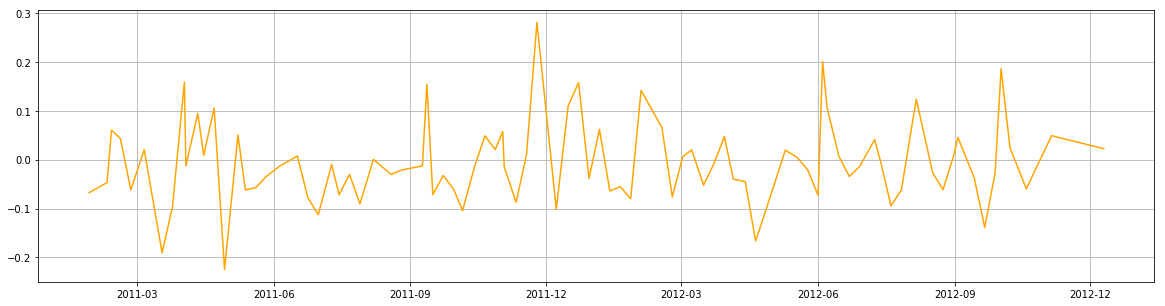

In [104]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

In [133]:
# External variables predictive power
col_ext = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df20_ext = df.where(df['Store']==20).dropna()
df20_ext = df20_ext.groupby(by=['Date'], as_index=False)[col_ext].mean()
df20_ext = df20_ext.set_index('Date')
df20_ext.head()